<a href="https://colab.research.google.com/github/ancestor9/24_fall_python-programimming-2/blob/main/1129_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%86%8C%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='yellow'> **Introduction to Machine Learning**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # 시각화 seaborn

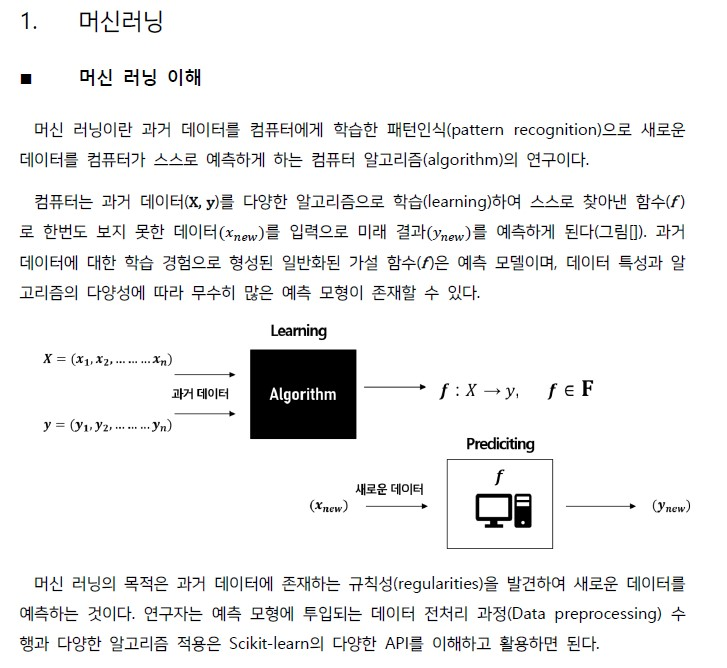

In [2]:
from PIL import Image
from IPython.display import Image

image1 = Image(filename='/content/01_머신러닝.jpg')
display(image1)

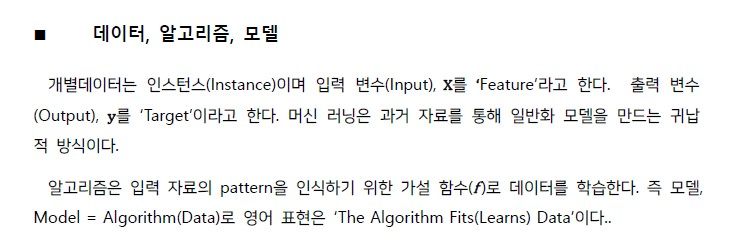

In [3]:
display(Image(filename='/content/02_모델.jpg'))

In [4]:
# https://github.com/amueller/mglearn, IBook 'ntroduction to Machine Learning with Python'
! pip install mglearn --quiet
import mglearn

# <font color='orange'> **1. 회귀 생성(Regression)**

w[0]: 0.393906  b: -0.031804


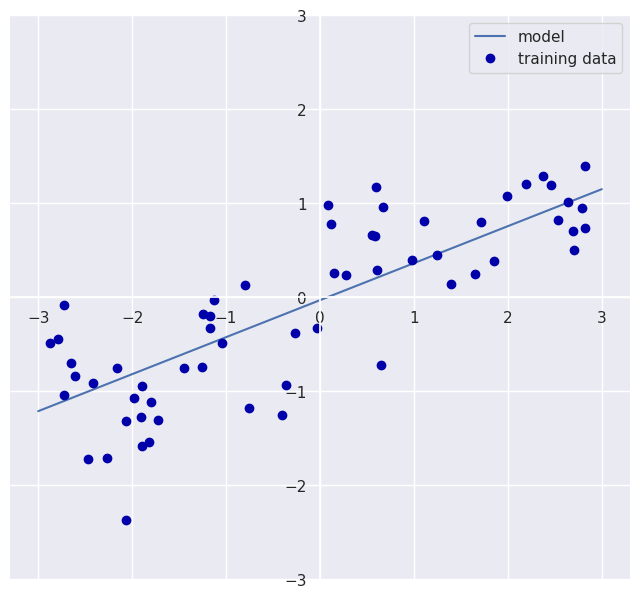

In [5]:
# Plot the linear regression wave dataset example
mglearn.plots.plot_linear_regression_wave()
# Display the plot
plt.show()

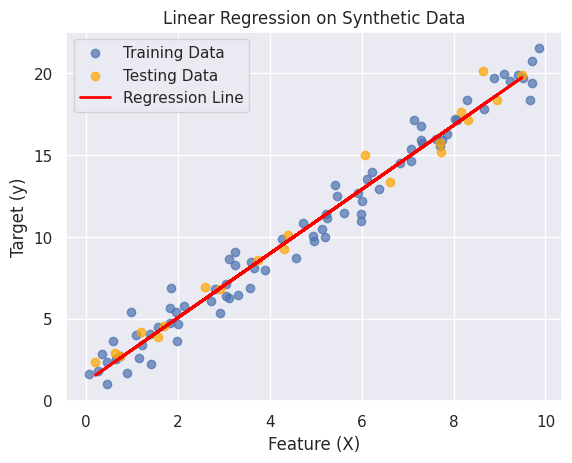

Coefficients: [[1.95986473]]
Intercept: [1.14291332]


In [6]:
# prompt: make regression으로 가상데이터를 만들고 regression 알고리즘으로 fit한 코드와 시각화

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data for regression
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 data points, 1 feature (between 0 and 10)
y = 2*X + 1 + np.random.randn(100, 1) # Linear relationship with noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the results
plt.scatter(X_train, y_train, label='Training Data', alpha=0.7)
plt.scatter(X_test, y_test, label='Testing Data', alpha=0.7, color='orange') #test set visualize
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line') # prediction line
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Linear Regression on Synthetic Data')
plt.legend()
plt.grid(True)
plt.show()

print("Coefficients:", model.coef_) # 회귀 계수 출력
print("Intercept:", model.intercept_) # 절편 출력

In [7]:
data = pd.DataFrame(X_train, columns=['X_train'])
data['y_train'] = y_train
data

,X_train,y_train
0,9.218742,19.506048
1,8.872127,19.707631
2,1.996738,4.650761
3,0.343885,2.830593
4,9.868869,21.519562
...,...,...
75,3.886773,7.990293
76,1.987157,3.653857
77,1.818250,4.733577
78,7.607850,15.970313


In [8]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(data[['X_train']], data['y_train'])

LinearRegression()

In [9]:
model.intercept_,  model.coef_

(1.1429133194585646, array([1.95986473]))

In [10]:
model.predict([[8]])

array([16.82183117])

In [11]:
model.intercept_ + model.coef_ * 8  # y_pred = a + bX

array([16.82183117])

### **다른 알고리즘으로 예측**

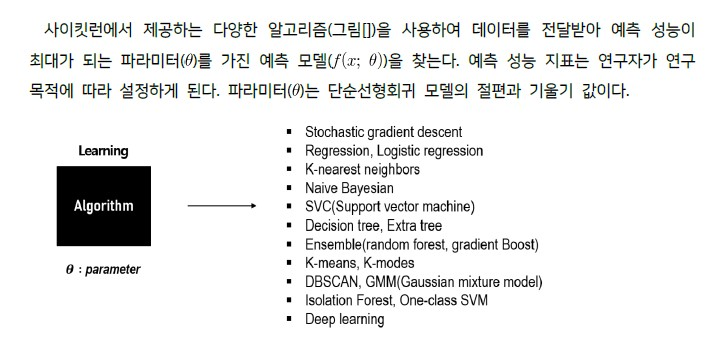

In [12]:
display(Image(filename='/content/03_알고리즘.jpg'))

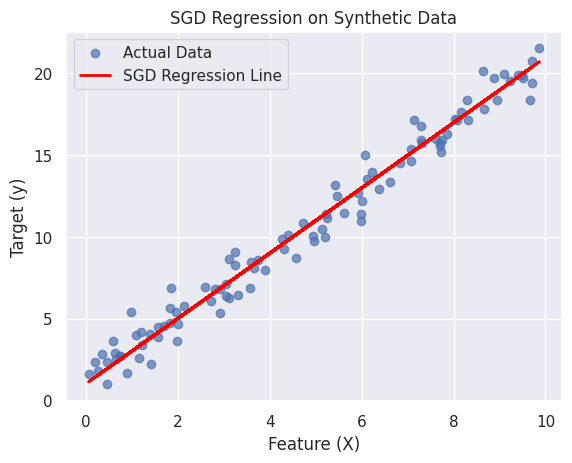

Coefficients: [1.99370011]
Intercept: [1.03217521]


In [13]:
# prompt: sgd regressor로 X, y를 그대로  예측하고 시각화

from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt

# Assuming X and y are already defined from the previous code

# Initialize and train the SGDRegressor model
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42) # Increased max_iter for convergence
sgd_regressor.fit(X, y)

# Make predictions
y_pred = sgd_regressor.predict(X)

# Visualize the results
plt.scatter(X, y, label='Actual Data', alpha=0.7)
plt.plot(X, y_pred, color='red', linewidth=2, label='SGD Regression Line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('SGD Regression on Synthetic Data')
plt.legend()
plt.grid(True)
plt.show()

print("Coefficients:", sgd_regressor.coef_)
print("Intercept:", sgd_regressor.intercept_)

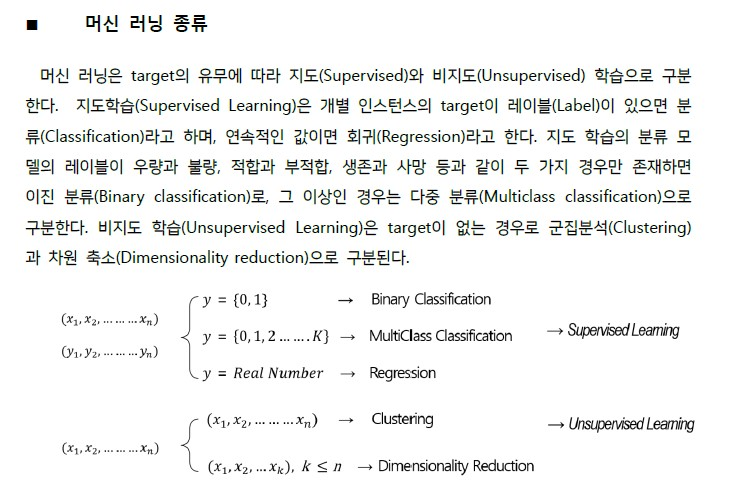

In [14]:
display(Image(filename='/content/04_머신러닝종류.jpg'))

# <font color='orange'> **2. 분류(Classification)**
## **Multiclass Classification**

<img src='https://miro.medium.com/max/1313/1*wY4puy2JRUMNu4akV1M9yQ.png'>

### 컴퓨터가 보는 세상
### Images are numbers !
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdL71mg%2Fbtq7pds2Fq4%2FUazA8WFnyR8kK5gOnlQqh0%2Fimg.png' width=600 height=600>

### Recognizing hand-written digits

In [15]:
from sklearn import datasets
digits = datasets.load_digits() #data = digits.images.reshape((len(digits.images), -1))
data = pd.DataFrame(digits.data, columns=[digits.feature_names])
data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


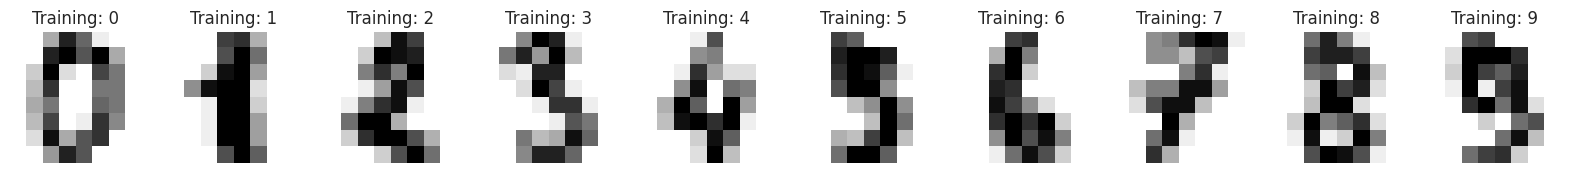

In [16]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 4))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

### 교차검증(cross validation)

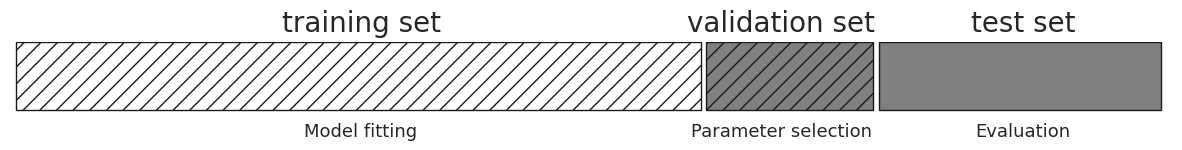

In [17]:
# https://github.com/amueller/mglearn, IBook 'ntroduction to Machine Learning with Python'
! pip install mglearn --quiet
import mglearn
mglearn.plot_cross_validation.plot_threefold_split()

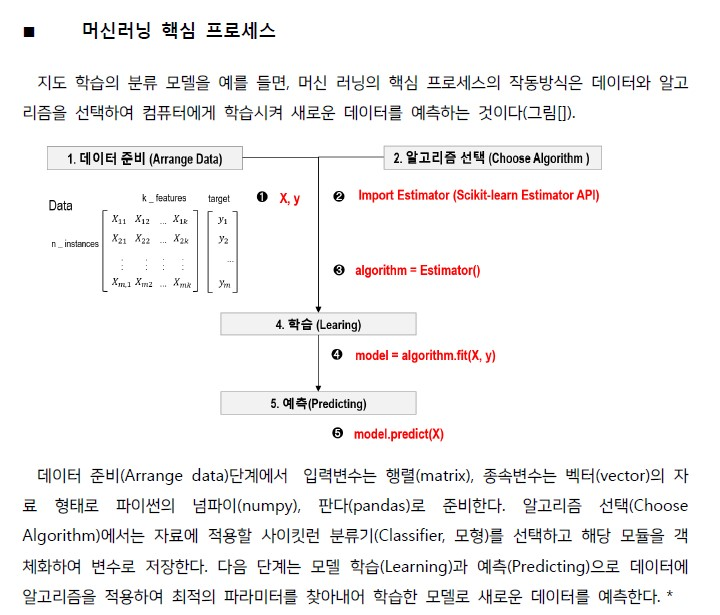

In [18]:
display(Image(filename='/content/05_예측모형작동구조.jpg'))

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, shuffle=False)

In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf

LogisticRegression()

In [21]:
clf.fit(X_train, y_train)

LogisticRegression()

In [22]:
predicted = clf.predict(X_test)

In [23]:
predicted

array([8, 6, 4, 8, 0, 8, 9, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 5, 8, 9, 0, 1, 2, 3, 4, 9, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
       9, 8, 9, 8, 4, 1, 7, 7, 3, 9, 1, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,
       2, 1, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 9, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,
       3, 5, 1, 0, 0, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 9,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1,
       9, 9, 1, 7, 6, 8, 4, 9, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7,
       2, 8, 2, 2, 5, 7, 9, 5, 4, 1, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 5, 9, 5, 4,

In [24]:
y_pred_proba = clf.predict_proba(X_test)
y_pred_proba

array([[2.77051434e-05, 1.14646270e-03, 1.58947188e-04, ...,
        1.82706042e-04, 9.93994759e-01, 1.80306653e-03],
       [3.78992095e-03, 1.55773525e-03, 7.54085733e-05, ...,
        3.22659741e-06, 4.33014828e-01, 9.27312942e-06],
       [2.46453767e-05, 9.08519239e-08, 2.03643075e-13, ...,
        1.15124039e-09, 3.19357049e-10, 1.90928614e-21],
       ...,
       [3.24826096e-10, 2.60655509e-07, 1.10001658e-08, ...,
        6.91544856e-12, 9.99996812e-01, 3.24409390e-11],
       [2.06241548e-05, 2.63146108e-10, 1.42014471e-10, ...,
        3.95508813e-07, 1.30310373e-03, 9.98674517e-01],
       [3.76307393e-08, 8.33809546e-07, 4.82482904e-07, ...,
        2.30389248e-10, 9.99862941e-01, 2.51843314e-05]])

In [25]:
y_pred_proba[0]

array([2.77051434e-05, 1.14646270e-03, 1.58947188e-04, 1.08037435e-04,
       1.66309677e-05, 2.53936480e-03, 2.23200337e-05, 1.82706042e-04,
       9.93994759e-01, 1.80306653e-03])

In [26]:
y_pred_proba[0].sum()

1.0

In [27]:
# Get the index of the maximum value in the first row
max_index = np.argmax(y_pred_proba[0])
# Print the index
max_index

8

In [28]:
y_test[0]

8

<Axes: >

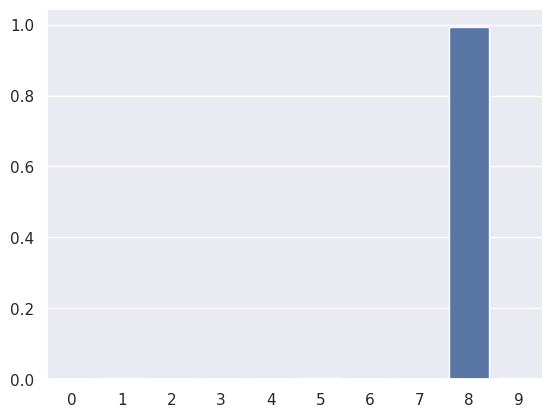

In [29]:
sns.barplot(y_pred_proba[0])

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted)

0.9299221357063404

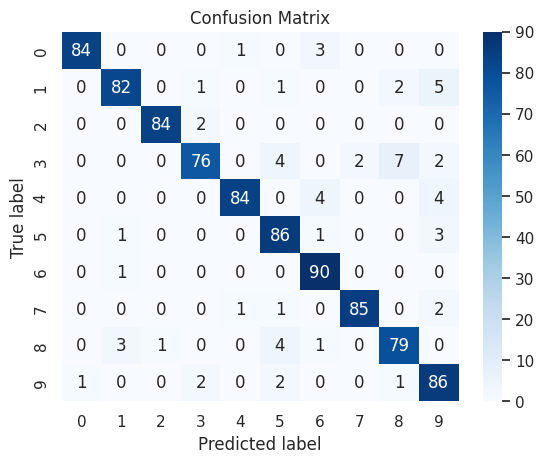

In [32]:
# prompt: confusion matrix를 시각화해줘 간단한 코드로
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, predicted)

# Create a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Set labels and title
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


### **다양한 알고리즘으로 데이터 예측**

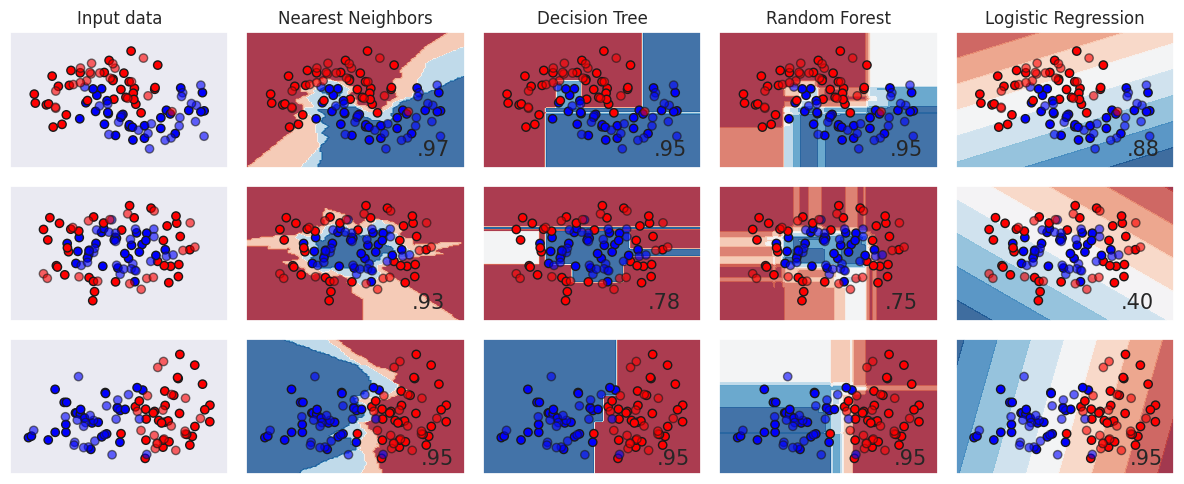

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Define the names and classifiers
names = [
    "Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "Logistic Regression",
]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),
    LogisticRegression(max_iter=1000, random_state=42),
]

# Generate datasets
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

# Set up the plot
figure = plt.figure(figsize=(12, 5))
i = 1

# Iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # Preprocess dataset, split into training and test parts
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Plot the dataset
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # Iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="k", alpha=0.6)

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(x_max - 0.3, y_min + 0.3, ("%.2f" % score).lstrip("0"), size=15, horizontalalignment="right")
        i += 1

plt.tight_layout()
plt.show()


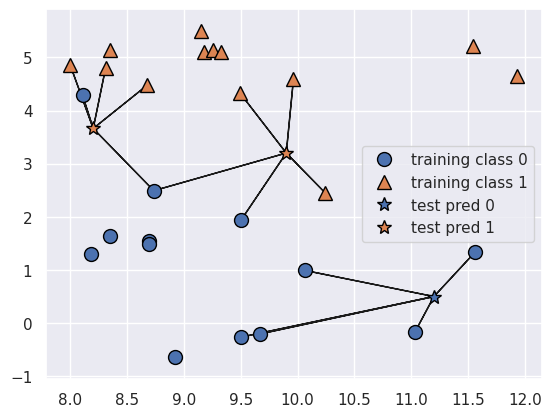

In [34]:
mglearn.plots.plot_knn_classification(n_neighbors=5) # Call the plot_knn_classification function within the mglearn.plots submodule.
plt.show() # Display the plot

### **[K-Nearest Neighbors Demo](http://vision.stanford.edu/teaching/cs231n-demos/knn/)**

### **Deep Learning**

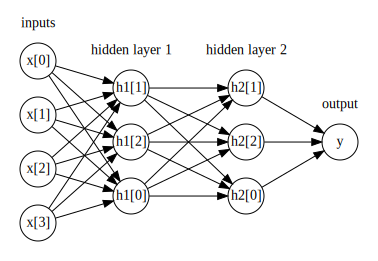

In [35]:
# Plot the diagram of a neural network with two hidden layers
mglearn.plots.plot_two_hidden_layer_graph()

In [36]:
from sklearn import datasets
digits = datasets.load_digits() #data = digits.images.reshape((len(digits.images), -1))
data = pd.DataFrame(digits.data, columns=[digits.feature_names])
data['target'] = digits.target
data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [37]:
# prompt: keras로 2개 hidden layer로 예측해줘

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Prepare the data
X = data.drop('target', axis=1)/255
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    keras.layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    keras.layers.Dense(10, activation='softmax') # Output layer with 10 neurons (for 10 digits)
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,570 (25.66 KB)

 Trainable params: 6,570 (25.66 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1637 - loss: 2.2934 - val_accuracy: 0.1736 - val_loss: 2.2688
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2180 - loss: 2.2545 - val_accuracy: 0.3194 - val_loss: 2.2070
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2787 - loss: 2.1858 - val_accuracy: 0.3056 - val_loss: 2.0929
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3209 - loss: 2.0550 - val_accuracy: 0.3681 - val_loss: 1.9181
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3848 - loss: 1.8678 - val_accuracy: 0.4861 - val_loss: 1.6940
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5105 - loss: 1.6304 - val_accuracy: 0.6389 - val_loss: 1.4345
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7231 - loss: 1.3700 - val_accuracy: 0.7708 - val_loss: 1.1942
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7748 - loss: 1.1319 - val_accuracy: 0.8125 - val_loss

In [39]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8380 - loss: 0.7461 
Test Loss: 0.7716
Test Accuracy: 0.8306
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [40]:
predictions[0]

array([0.06300429, 0.05208856, 0.01471196, 0.00186076, 0.08743019,
       0.0040014 , 0.7232301 , 0.00143481, 0.04223167, 0.01000629],
      dtype=float32)

In [41]:
predicted_labels[0]

6

In [42]:
y_test.head()

,target
1245,6
220,9
1518,3
438,7
1270,2


In [43]:
y_test['predict_y'] = predicted_labels
y_test

,target,predict_y
1245,6,6
220,9,9
1518,3,3
438,7,5
1270,2,2
...,...,...
1731,4,4
1630,3,3
1037,8,8
965,3,9


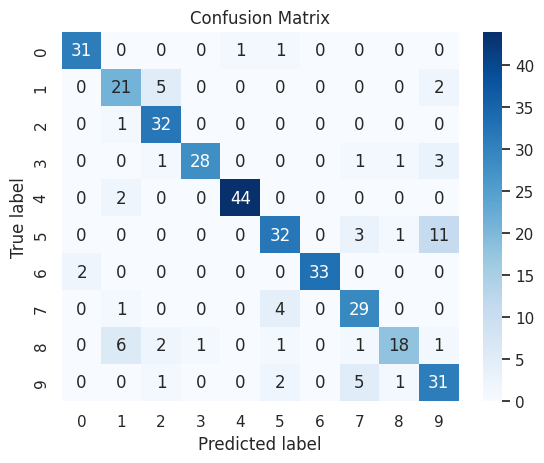

In [44]:
# Replace 'label' with the actual name of your target column in y_test
# For example, if your target column is named 'target', use:
cm = confusion_matrix(y_test['target'], predicted_labels)

# Create a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Set labels and title
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

# **자료의 종류**

## **1. Tabular data**
<img src='http://jalammar.github.io/images/pandas-intro/0%20excel-to-pandas.png' width =600 height =300>

## **2. Audio and Timeseries data**
<img src= 'http://jalammar.github.io/images/numpy/numpy-audio.png' width =600 height =300>

## **3. Image data**
<img src='http://jalammar.github.io/images/numpy/numpy-grayscale-image.png' width =600 height =300>
<img src='http://jalammar.github.io/images/numpy/numpy-color-image.png' width =600 height =300>

## **4. Text data**
<img src='http://jalammar.github.io/images/numpy/numpy-nlp-embeddings.png' width =600 height =300>
<img src='http://jalammar.github.io/images/numpy/numpy-nlp-bert-shape.png' width =600 height =300>

### **과거 데이터로 미래를 예측한다?**

## **[autodraw](https://www.autodraw.com/)**

### **순서가 있는 데이터**
<img src ='https://gaussian37.github.io/assets/img/dl/concept/transformer/0.png'>

### **Tokenizing**
### **[Tokenizer](https://huggingface.co/learn/nlp-course/chapter2/4?fw=pt)**

In [45]:
tokenized_text = "Using a Transformer network is simple".split()
tokenized_text

['Using', 'a', 'Transformer', 'network', 'is', 'simple']

In [46]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

tokenizer("Using a Transformer network is simple")

{'input_ids': [101, 7993, 170, 13809, 23763, 2443, 1110, 3014, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

## 1. 언어 번역 (Language Translation)
Transformer의 가장 기본적인 응용사례는 언어 번역입니다. Hugging Face 라이브러리를 사용하여 한 언어에서 다른 언어로 번역할 수 있습니다.

In [47]:
from transformers import MarianMTModel, MarianTokenizer

# 영어에서 프랑스어 번역 모델
model_name = 'Helsinki-NLP/opus-mt-en-fr'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

text = "The future of AI is incredibly exciting."
inputs = tokenizer(text, return_tensors="pt", padding=True)
translated = model.generate(**inputs)
translated_text = tokenizer.decode(translated[0], skip_special_tokens=True)

print(translated_text)  # 예상 출력: "L'avenir de l'IA est incroyablement excitant."

L'avenir de l'IA est incroyablement excitant.


## 2. 텍스트 생성 (Text Generation)
텍스트 생성에서는 특정 주제에 대해 연속된 텍스트를 생성할 수 있습니다. OpenAI의 GPT 모델을 사용하여 이를 수행할 수 있습니다.

In [48]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

prompt = "Artificial intelligence is transforming the world by"
inputs = tokenizer(prompt, return_tensors="pt")
outputs = model.generate(inputs.input_ids, max_length=50, num_return_sequences=1)

generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Artificial intelligence is transforming the world by creating new ways to interact with the world around us.

The world is changing, and we need to change it.

We need to change the way we interact with the world around us.



## 3. 감정 분석 (Sentiment Analysis)
Transformer 모델을 사용하여 텍스트의 감정을 분석할 수 있습니다. 예를 들어 리뷰 데이터에서 긍정 또는 부정적인 감정을 분류하는 데 사용할 수 있습니다.

In [49]:
from transformers import pipeline

# 감정 분석 파이프라인 생성
classifier = pipeline('sentiment-analysis')

text = "I love the new features of this product! It's amazing."
result = classifier(text)

print(result)  # 예상 출력: [{'label': 'POSITIVE', 'score': 0.99}]

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9998862743377686}]


## **[HuggingFace model](https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english)**

## 4. 요약 생성 (Text Summarization)
문서나 긴 텍스트에서 중요한 정보를 추출하여 요약하는 작업입니다. Hugging Face의 Bart 모델을 사용하여 긴 문서를 간단히 요약할 수 있습니다.

In [50]:
from transformers import BartForConditionalGeneration, BartTokenizer

model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

article = """
Artificial Intelligence (AI) is one of the most rapidly advancing fields in technology today.
With applications ranging from natural language processing to robotics, AI is transforming the way we live and work.
Recent advancements in deep learning and machine learning have pushed the boundaries of what is possible, creating new opportunities and challenges.
"""
inputs = tokenizer([article], max_length=1024, return_tensors="pt", truncation=True)
summary_ids = model.generate(inputs["input_ids"], max_length=50, min_length=25, length_penalty=2.0, num_beams=4, early_stopping=True)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print(summary)  # 요약된 텍스트 출력

Artificial Intelligence (AI) is one of the most rapidly advancing fields in technology. With applications ranging from natural language processing to robotics, AI is transforming the way we live and work.


## 5. 문장 분류하기(Text Classification)

In [51]:
from transformers import pipeline

# Zero-shot-classification 파이프라인 사용하기
classifier = pipeline("zero-shot-classification")

# 예시 문장들
sentences = [
    "I love this product! It's amazing!",
    "The service was terrible, I am very disappointed.",
    "It was an average experience, nothing special."
]

# 가능한 레이블들 정의하기
labels = ["Positive statement", "Negative statement", "Neutral statement"]

# 문장 분류 실행하기
results = [classifier(sentence, candidate_labels=labels) for sentence in sentences]

# 결과 출력
for sentence, result in zip(sentences, results):
    print(f"Sentence: {sentence}")
    print(f"Label: {result['labels'][0]}, Score: {result['scores'][0]:.4f}\n")

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Sentence: I love this product! It's amazing!
Label: Positive statement, Score: 0.9608

Sentence: The service was terrible, I am very disappointed.
Label: Negative statement, Score: 0.9606

Sentence: It was an average experience, nothing special.
Label: Neutral statement, Score: 0.7779



### **한국어 텍스트 마이닝**
#### **[파이썬 한국어 NLP](https://konlpy.org/ko/v0.4.4/)**

In [52]:
!pip install konlpy --quiet

In [53]:
from konlpy.tag import Kkma

kkma = Kkma()

text = "아버지가 방에 들어갑니다. 엄마는 시장에 갑니다."

kkma.nouns(text)

['아버지', '방', '엄마', '시장']

# End